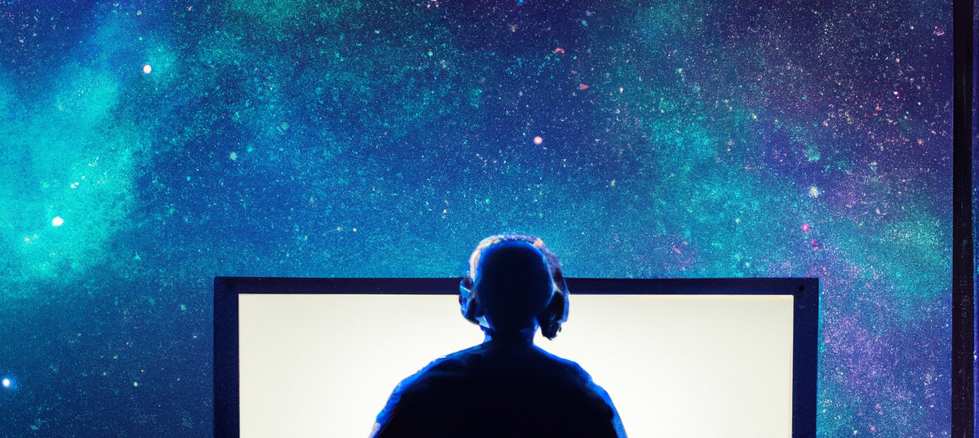

In [1]:
import os
from IPython.display import Image
os.path.join(os.path.expandvars("%userprofile%"),"Documents\\Github\\ml-market-efficiency\\")
Image(filename="./images/title_pic_medium.png")

# Quantifying Market Efficiency: A Python & Machine Learning Approach Across Asset Classes #

#### By Scott Morgan
Throughout the majority of my career, I've been in the company of fixed income money managers who assert their expertise in evaluating and trading relative value across a company's capital structure. However, despite hearing such claims, I never had tangible proof of this dynamic between asset classes. With the advent of cutting-edge machine learning methodologies, I aim to provide a fresh, albeit informal, perspective on the potential flow of information between different asset classes and quantifiably answer questions like ***"Can a portfolio manager use the changes in company XYZ's high yield bond prices as a leading indicator for XYZ's equity?"***

While this exploration primarily stems from my long-standing intellectual curiosity and the desire to enrich my personal project portfolio, it is worth noting that this article is not intended as a formal commentary on the efficient market hypothesis. Instead, it's a creative foray into understanding inter-asset relationships more deeply through machine learning.

<span style="color:red">**Spoiler Alert: The fixed income money managers might be right!**</span>

In the following sections we delve into the return profiles and characteristics of major asset classes before turning to the intricacies of market efficiency, its layers, and its significance in the sphere of active management. Leveraging various python libraries and the Bloomberg Professional Service, we seek to uncover which, if any, asset classes exhibit informational inefficiencies and if this can be exploited for potential profit. This will setup potential areas of further research covering specific trading strategies.

## Dissecting Market Efficiency and its Implications for Active Portfolio Management

The Efficient Market Hypothesis (EMH) has long been at the forefront of financial discourse. Burton Malkiel's notable contribution, positing the stock market as a 'random walk', implies that future stock prices are independent of their past, presenting a formidable challenge to anyone seeking an edge in predicting market movements. This is expounded through three layers of market efficiency:

- **Weak Form**: Proposes past price and volume data can't forecast future prices.

- **Semi-Strong Form**: Suggests all publicly accessible information is factored into asset prices.

- **Strong Form**: Contends that every piece of information, public or private, is already reflected in asset prices.


This theoretical framework has significant implications for active portfolio managers. Newer entrants, like algorithmic traders and robo-advisors, have ramped up competition, diminishing the traditional informational edge of human managers. The swift action of these technologically-equipped entities makes the window to exploit market inefficiencies exceedingly small. Additionally, the mounting popularity of passive, cost-efficient mechanisms, like index funds, has put active managers' fees and performance under intense scrutiny.

Historically, the primary asset classes available to investors consisted broadly of stocks and bond. Today, the financial landscape has broadened to include developing and emerging market asset classes of varying sizes and styles, making the world of investment more diverse yet complex. For active managers, this diversification means new opportunities but also novel challenges and risks.

Next, we examine the return distributions, drawdowns and correlations for a number of major asset classes. Understanding these areas will offer insights into potential risks, rewards, and the interplay among different investment avenues.

In [2]:
from utils.helpers import *
from utils.data_import_and_processing import *
from utils.visualization import *

import importlib
import utils.market_efficiency_tests
importlib.reload(utils.market_efficiency_tests)
from utils.market_efficiency_tests import *

index_prices, index_returns = fetch_and_save_data(tickers, start_date, end_date, index_prices_path, index_returns_path)
lagged_targets = generate_lagged_returns_and_targets(index_returns)
combined_data = generate_and_combine(index_prices,lagged_targets)

Data loaded from existing CSV files.
Data import process completed.
Feature engineering completed.


## The Landscape of Asset Class Returns

We start our analysis by examining asset class returns spanning approximately 20 years of daily data. Ideally, we'd like financial market return data to mimic a normal distribution: predominantly smaller gains, fewer small losses, and minimal large swings or volatility - though is rarely the case in reality. 

Certain characteristics hint at possible inefficiencies. Two terms we discuss are skewness and kurtosis:

### Skewness:
- **Reference Range:** Typically lies between -3 and +3.
  - Values closer to 0 suggest symmetry.
  - Negative values suggest potential for occasional large losses, hinting at potential inefficiencies in pricing specific risks.
  - Positive values indicate the possibility of periodic significant gains.

### Kurtosis:
- **Reference Range:** A value around 3 indicates a normal distribution.
  - Values significantly greater than 3 suggest a distribution with tails heavier than a normal distribution, indicating more extreme returns.
  - Values less than 3 imply a distribution with lighter tails, signifying fewer extreme returns.

With these benchmarks in mind:

- **US Bank Loans:** The kurtosis value of 93.23 is notably high, hinting at extremely atypical return fluctuations, influenced solely by 11 outlier days from early 2020 during the onset of the COVID-19 pandemic. The pronounced negative skewness indicates the likelihood of large downturns, signaling potential inefficiencies. I do not remove these outliers when building predictive models in the coming sections to preserve the integrity of the dataset and accurately capture the real-world dynamics of the asset class.

- **US High Yield Bonds and Emerging Market Debt:** These classes display significant kurtosis values, suggesting they experience more extreme return variations. Their negative skews indicate potential downside risks, implying inefficiencies in these markets.

- **US Large Cap Equities, US Small Cap Equities, and Emerging Market Equities:** These assets exhibit relatively mild skewness and kurtosis values, aligning more closely with the characteristics of a typical distribution.

In the following section, the analysis is taken a step further with discussion of **drawdown** by asset class. 


                            Skewness   Kurtosis
US Large Cap Equities      -0.361336  11.111269
US Small Cap Equities      -0.420484   6.690497
US Investment Grade Bonds  -0.707514   6.989607
US High Yield Bonds        -1.567971  25.884649
US Bank Loans              -4.337148  92.514116
Developed Country Equities -0.094855  12.244390
Emerging Market Equities   -0.114532  11.086358
Emerging Market Debt       -1.988816  27.250750


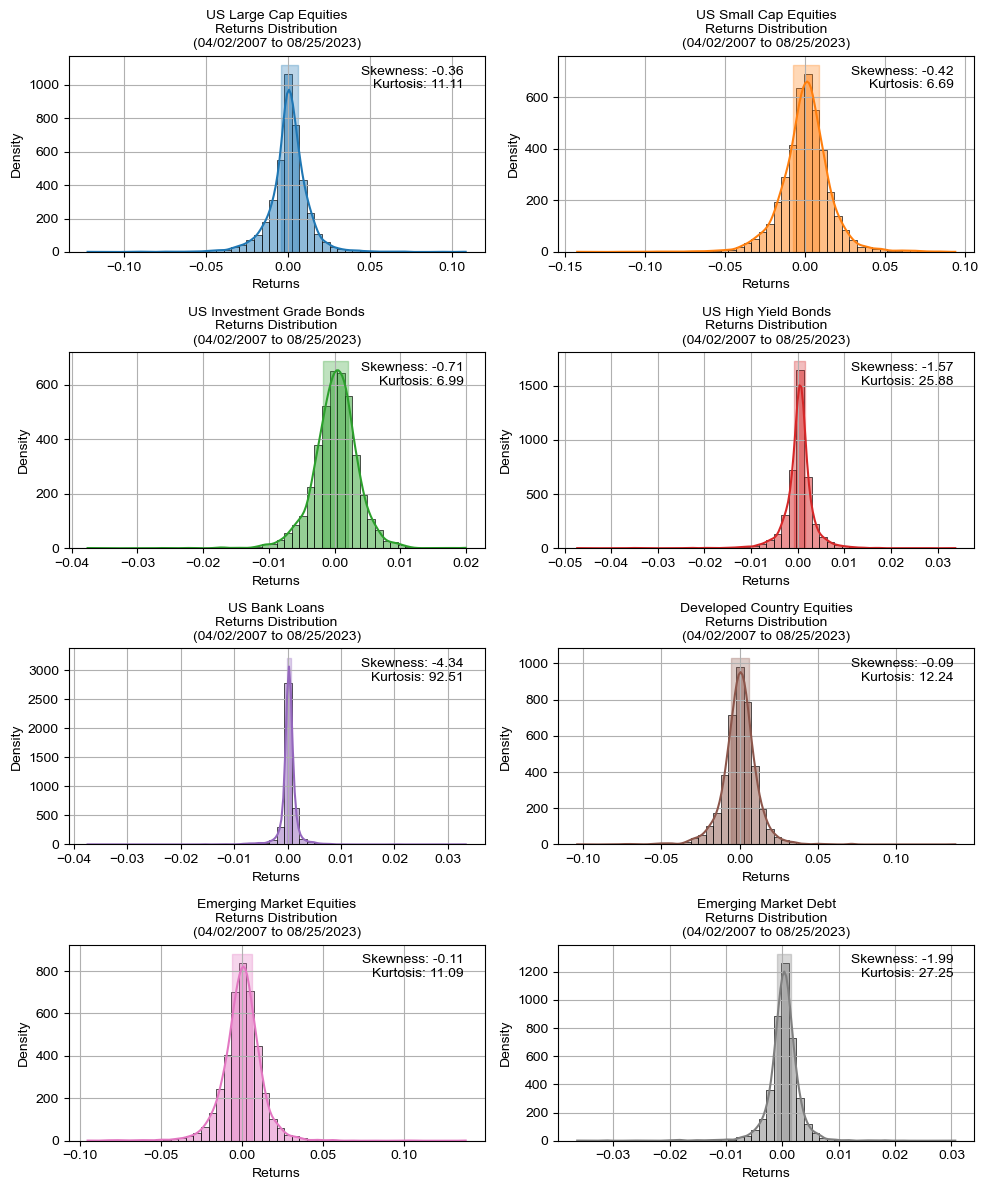

In [3]:
# Now, calculate skewness and kurtosis
skew_kurt_df = calculate_skewness_kurtosis(index_returns)

# Proceed to plot the distribution
plot_distribution(index_returns, skew_kurt_df, start_date, end_date)

## Unraveling Drawdown Dynamics: A Mirror to Market Efficiency?

Understanding drawdown is pivotal in dissecting the behavior of asset classes. At its core, a drawdown represents the decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face.

### Drawdown & Its Signficance:
- **Definition:**  The decline from a peak to a trough in the value of an investment, signaling the potential downside risk an investor could face. Reflects the **risk of loss** an asset might present.
- **Market Efficiency:** A lower drawdown typically suggests **stability**, but it can also hint at inefficiencies when juxtaposed against other metrics.

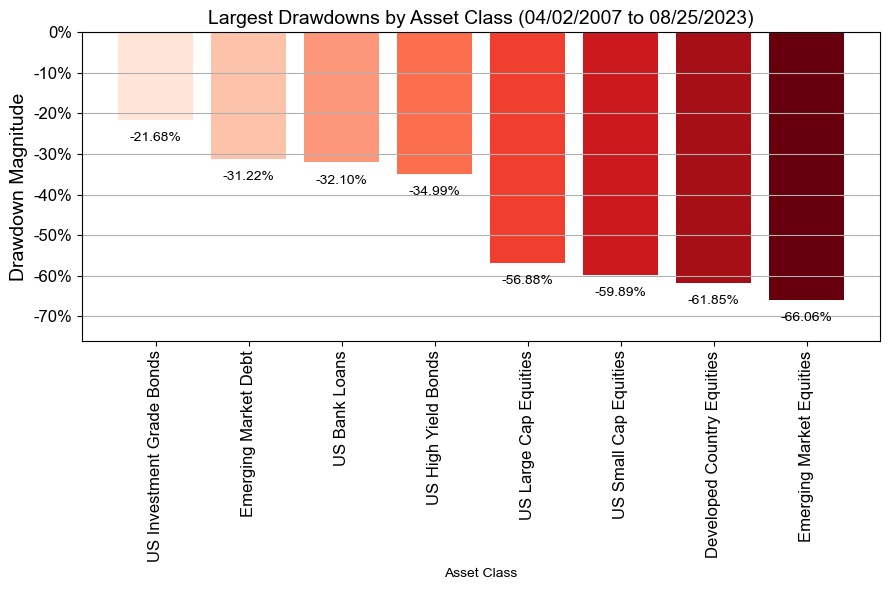

In [4]:
plot_drawdowns(index_returns, start_date, end_date)

Given this backdrop:

- **US High Yield Bonds and US Bank Loans:** Despite showing signs of potential inefficiency in their return distributions, they have some of the smallest drawdowns. This contrast poses questions:
  - Is their market or instrument structure inherently stable, allowing such drawdown dynamics?
  - Do these apparent inefficiencies, paradoxically, stabilize these markets or are there other factors at play?

From an investment strategy standpoint:

- Assets with smaller drawdowns, even if showing potential inefficiencies, become attractive. They signal the possibility to exploit mispricings while also ensuring a more stable performance trajectory.

The subsequent sections will discussion the correlations among the asset classes for the analysis time period.

## Correlation Analysis: A Lens to Market Efficiency

At the heart of understanding market dynamics is the concept of correlation. It measures how asset class returns move in relation to each other over time.

### Correlation & Its Significance:
- **Definition:** Indicates the strength and direction of the linear relationship between two asset classes. A value closer to 1 means they move together; closer to -1 means they move in opposite directions.
- **Diversification:** Identifying assets that don't move in lockstep can help in constructing portfolios that balance risk.
- **Market Efficiency:** Highly correlated assets might be responding to similar market information, while assets with low or negative correlations could be influenced by different factors.


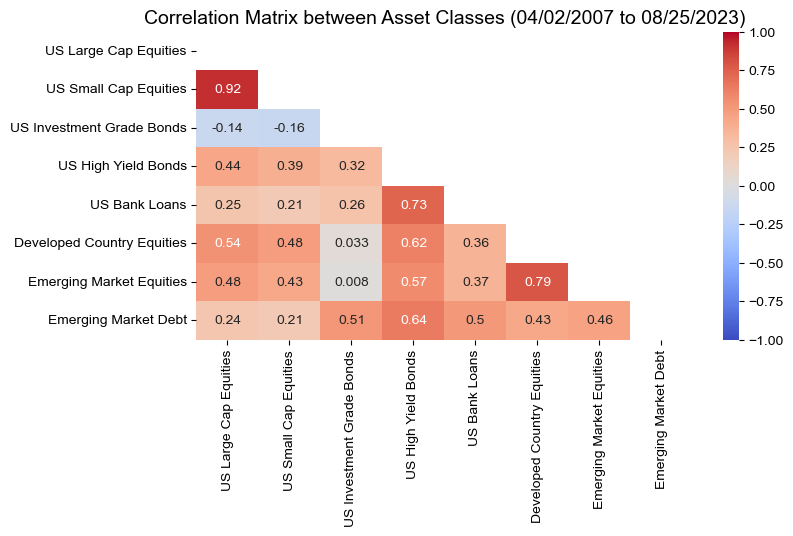

In [5]:
plot_correlation(index_returns, start_date, end_date)

Given this backdrop:

- **US Large Cap Equities and US Small Cap Equities:** A high correlation of 0.917 underscores their synchronized movement, suggesting they might be influenced by similar market dynamics.
  
- **US Investment Grade Bonds:** Displaying a mild negative correlation with both Large and Small Cap Equities, these bonds offer diversification benefits, potentially hinting at differing driving factors in their markets.

- **US High Yield Bonds and US Bank Loans:** Their strong positive relationship suggests a similar risk and return profile, possibly echoing shared market influences.

- **Emerging Market Equities and Developed Country Equities:** A correlation coefficient of 0.782 indicates they often move in harmony, which might be due to shared global factors impacting them.

These correlation patterns not only inform asset allocation decisions but also pave the way for deeper dives into market efficiency. Understanding these interconnections can unveil potential anomalies in the ways markets process and reflect information.



In [ ]:
plot_correlation(index_returns, start_date, end_date)

## Empirical Analysis Across Asset Classes ##

### Weak Form Efficiency and Autocorrelation

The weak form of the Efficient Market Hypothesis (EMH) posits that current asset prices fully incorporate all available historical information, primarily past prices. Hence, investors shouldn't be able to consistently earn above-average returns using historical data alone. In this context, if an asset class's returns display significant autocorrelation (i.e. if points are above the blue shaded regions in below graphs), it could indicate that past returns have some predictive power over future returns. This would challenge the notion of weak form efficiency, as it implies that there's some momentum or mean reversion in returns that could potentially be exploited

#### Methodology

The Autocorrelation Function (ACF) plots directly below reveal insights into the predictability and structure of financial time series, potentially hinting at market efficiency.

In [ ]:
plot_autocorrelation(index_returns, readable_names)

#### Weak Form Findings
Diving into the autocorrelation of asset class returns offers intriguing insights. **US Large Cap and Small Cap Equities** both show initial mean reversion tendencies with their pronounced negative autocorrelation at the first lag. **US Investment Grade Bonds** differ, hinting at potential momentum with positive initial lags. The momentum is also evident in **US High Yield Bonds and US Bank Loans**, where the persistence of positive autocorrelation across several lags suggests potential inefficiencies or return predictability. Meanwhile, **Developed Country Equities** and **Emerging Market Equities** present a mixed interplay of market dynamics, revealing potential inefficiencies in their patterns. **Emerging Market Debt**, much like the **High Yield Bonds**, also suggests momentum, especially in the initial lags. 

***These findings suggest that past returns of US High Yield Bonds, US Bank Loans and Emerging Market Debt during the time period potentially explain future returns; thus inefficiencies could exist in these markets. The remaining asset classes behave as a random walk and are potentially weakly efficient.***



### Semi-Strong Form Efficiency and Using Machine Learning to Test Market Reaction ###

The semi-strong form of market efficiency asserts that asset prices adjust rapidly to all publicly available information (green line below) and are unpredictable (i.e. a random walk), so neither technical analysis nor fundamental analysis can consistently achieve superior returns. If markets are semi-stong inefficient, prices will adjust gradually and should be more predictable.

#### Methodology

To examine the semi-strong form of the EMH, I used an XGBoost classifier—a very popular gradient boosting framework - because of its versatility and transparency. The essence of our test: If the models, trained on historical technical indicators, can consistently predict post-event returns with an accuracy significantly greater than 50%, it implies that the asset class doesn't rapidly incorporate event-related data, challenging the semi-strong form of EMH. Conversely, an accuracy close to or below 50% would suggest that post-event returns are seemingly random after accounting for known event information, supporting the semi-strong form.

The dataset was split into 'event' and 'non-event' periods. Models were trained for each respective asset class (8 total) on the 'non-event' days and put to the test on the 'event' days, mimicking a real-world scenario where investors aim to exploit new public data. Below is an interactive summary of the periods. The 'event days' are a 30 day window following the announcement of a event (see reference table below chart for expect starts). 

In [ ]:
# plot_cumulative_returns_with_events(index_returns)
# display_event_table()

 I constructed a number of trailing technical features from the historical price data of the asset classes. These are the independent variables. For the targets, or dependent variables, I used the next day (t+1) returns of the respective indexes. Below are the descriptions of each.
 
<u>**Dependent Variables**</u>
- **SMA (Simple Moving Average):** The average price of an n asset over a specific number of days. It's "simple" because each day's price has equal weight.

- **EMA (Exponential Moving Average):** Similar to SMA, but it gives more weight to recent prices. This responsiveness means EMA reacts more quickly to price changes than SMA.

- **RSI (Relative Strength Index):** A momentum oscillator ranging from 0 to 100, indicating the speed and change of price movements. Typically, an RSI above 70 suggests an asset might be overbought, while an RSI below 30 suggests it might be oversold.

- **MACD (Moving Average Convergence Divergence):** A trend-following momentum indicator, represented by the difference between a short-term EMA and a long-term EMA. MACD signals are typically derived from its crossovers with its signal line (an EMA of the MACD itself).

<u>**Targets/Dependent Variables**</u>
- **Next Day Returns:** The target variables are the next day (t+1) returns of the respective indexes. I chose to use future returns versus prices because predicting returns is more feasible; returns capture relative changes and inherent volatility, providing clearer insight into an asset's dynamic behavior. Next, I transformed the returns into binary variables: '1' for a positive return and '0' for a negative return. By converting continuous next-day returns into binary indicators, we focus on predicting directional trends rather than exact magnitudes, simplifying the modeling process and reducing noise.

<u>**Evaluation**</u>

We evaluate the models at T+5 days, T+30 days, T+60 days and T+90 days. By testing the model's performance across varying time periods after an event, I am examining the speed at which new information is incorporated into prices across different asset classes. If a model consistently generates accurate predictions greater than 50% long after an event, it could indicate inefficiencies in the market or that the market is taking longer to assimilate the new information, which would challenge the semi-strong form of the EMH.

In evaluating the models across different time periods, the primary metric of interest remains the F1 Score. This metric becomes especially significant in contexts like financial trading where both types of errors – false positives (erroneously buying) and false negatives (missing out on a genuine buying opportunity) – are financially penalizing. The F1 Score serves as an optimal metric because it is the harmonic mean of precision and recall, ensuring that a model not only provides trustworthy positive predictions (signifying high precision) but also efficiently identifies the majority of genuine positive opportunities (indicating high recall). 

While we have multiple metrics at our disposal, the dynamic nature of financial markets necessitates the exploration of models across varied time frames. This is crucial as different periods might unveil diverse patterns or anomalies. By identifying the top-performing model across the most relevant time frame for our strong form tests, we're better positioned to harness potential market efficiencies or pinpoint areas of exploitability.

In [ ]:
#Run XGBoost Models
final_table, styled_evaluation_df = display_styled_evaluation(combined_data, highlight_f1)

#### Semi-Strong Findings

The results suggest a nuanced understanding of market efficiency across different time intervals. 

- For US Large Cap Equities, the F1 scores progressively increased from 0.64 over 5 days to 0.56 over 90 days. While this indicates a trend towards randomness and supports the semi-strong form of the Efficient Market Hypothesis (EMH), there are fluctuations that warrant closer examination. On the other hand, US Small Cap Equities exhibited scores ranging from 0.45 to 0.52, showcasing more pronounced volatility in shorter time frames, which stabilizes over longer durations.

- US Investment Grade Bonds, with F1 scores ranging from 0.43 to 0.55, exhibit moderate efficiencies over the tested time intervals. However, **US High Yield Bonds and US Bank Loans, displaying scores like 0.62 and 0.75, respectively, over a 90-day period, reinforce the earlier observation of stronger pattern recognition capabilities. These scores, being considerably above the 0.5 mark, suggest potential inefficiencies in these markets. It implies that there's room for investors or traders to potentially capitalize on certain patterns or information.**

- Developed Country Equities, Emerging Market Equities, and Emerging Market Debt display scores that hover around the 0.5 to 0.6 range, suggesting a degree of randomness but with some hints of pattern recognition, especially in the longer time frames. This could be indicative of semi-strong market efficiency, but the door remains open for further analysis and scrutiny.

To summarize, while some asset classes seem to align more closely with the semi-strong form of the EMH, others, especially US High Yield Bonds and US Bank Loans, indicate potential market inefficiencies that might be exploitable.

A few caveats to bear in mind:

- **1** These results do not provide definitive proof regarding the EMH but rather offer insights into varying efficiency levels across asset classes.

- **2** The models weren't subjected to hyperparameter tuning, which could potentially enhance their performance and provideclearer insights.
 
Next, I will leverage transfer learning to test strong form efficiency, capitalizing on the top performing model (in this case, US Bank Loans, given its high F1 score) and applying it to other assets. This would test the hypothesis of whether patterns recognized in one asset class can be translated and exploited in others, further challenging the tenets of the EMH.

### Strong Form Efficiency & Transfer Learning

In [ ]:
Image(filename="./images/strong_visual.png")

The strong form of market efficiency posits that all information, public and private, is instantly reflected in asset prices. Testing this hypothesis requires examining whether models trained on one set of data (say, public data) can generalize and make predictions on another set (potentially mimicking private information scenarios). Transfer learning is a natural fit for this kind of evaluation.
<!-- 
<center>
<img src="attachment:f4fc5060-33aa-4984-a10c-2d2d1a5f82c9.png" style="width: 600px">
</center> -->




#### Methodology

Historically a powerhouse technique in deep learning, especially in the domain of image and language processing, transfer learning allows models trained on one dataset to apply their knowledge to a different, though related, dataset. In our context, this means leveraging the patterns and intricacies learned from one asset class, such as bank loans, to potentially enhance the model's predictive capability on another, like equities or bonds. The underlying assumption is that there might be hidden, overarching market dynamics or patterns that are universal across different asset classes.

The choice of using transfer learning is multifaceted. Not only does it provide an opportunity to harness the potential cross-asset predictive power, but it also challenges the very core of the strong form market efficiency. If our models, armed with transfer learning, can consistently outperform the market, it might suggest that there are inefficiencies, or at least patterns, that even sophisticated market participants haven't fully grasped.

I initially turned to the XGBoost algorithm, famed for its precision and adaptability. Yet, the intricate temporal dynamics and complex non-linearities inherent in financial data exposed its limitations. Financial markets, with their multifaceted interactions and time-sensitive structures, demand models that can capture depth and complexity. Enter Keras deep learning models. These models, equipped with capabilities to automatically discern crucial features, adeptly handle sequential data, and intricately model inter-variable relationships, emerged as a more suitable choice. This shift from XGBoost to a Keras-based approach underscores the criticality of aligning the modeling tool with the complexities of the task, especially in the enigmatic realm of finance. 

So in order to complete this series of tests, I had to retrain our XGBoost models using Keras. The results are below and are similar to our original results, with US Leveraged Loans outperforming and will therefore be used as our base model. Transfer learning comes into play when we adapt the US Leveraged Loan model to other asset classes. If this adapted model also performs well on other asset classes, it might suggest that certain information is consistently not being incorporated across multiple asset classes.

#### Strong Form Findings

In [ ]:
#Run Keras Models
final_table, styled_evaluation_df = keras_display_styled_evaluation(combined_data, highlight_f1)

In [ ]:
transfer_display_styled_evaluation(combined_data, highlight_f1)

# Remove Bank Loans
### Fix charts above
### Make a comparison chart --- if the Kerasbank loan model improved the other asset class predictablility, those markets might be inefficient to that information.

Given that some bank loan companies are private and might possess material non-public information, the use of data from this asset class could mean the model is tapping into information patterns not fully available or understood by the broader market. If transfer learning models consistently and significantly outperform the market by leveraging this data, it would suggest the potential presence of inefficiencies in the market's pricing of public information, even if not a direct contradiction of the strong form of the EMH. However, it's essential to approach such conclusions with caution. Above-average performance might be due to overfitting, specific market conditions, or other nuances. Furthermore, while back-tested results can be promising, real-world trading, with its associated costs and complexities, can present a different picture.

## Summary

## Contact information:

scott@scottmmorgan.com

https://www.linkedin.com/in/scottmmorgan/

## Company-specific Instances
Zoom into specific examples to showcase discrepancies or efficiencies within an individual company's capital structure.

When drilling down, it's essential to select companies that have both actively traded equities and bonds. Here are some suggestions:

***Apple Inc.***: Known for issuing bonds despite having a huge cash reserve. Its equity and bonds could respond differently to product launches or other news.

***Microsoft Corporation***: Another tech giant with both active equities and bonds.

***AT&T Inc.***: A company with a significant debt load, providing opportunities to analyze both equity and debt.

***Amazon Inc.***: Given its dominance and wide array of business activities, news and events could trigger varied responses in its capital structure.

***Walmart Inc.***: A retail giant, its equity and debt dynamics could be influenced by economic cycles, consumer behavior, etc.

Once you've chosen a company and run the initial code, please share the results for interpretation, and I'll assist you in deriving insights from the data!

## ML-Driven Investment Strategies
Introduce and discuss potential machine learning strategies that could exploit detected inefficiencies.

## Limitations, Assumptions and Future Research

In [ ]:
only for time period, 

## Conclusion
Recap the findings, discuss their implications, and leave the readers with thoughts on future possibilities in the realm of quantitative finance and machine learning.